# <center>Final Project Computational Intelligence</center>

##### Abyan Ahmad - 05111942000013
##### Gede Yoga Arisudana - 05111942000009
##### Zulfiqar Rahman Aji - 05111942000019

## <center>Preparing Volcanic Eruption Dataset</center>

### Import library and load Volcanic Eruption dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import svm, datasets
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.express as px
import geopandas as gpd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
volcanoes = pd.read_csv('volcanic.csv')

### Diagnose data for cleaning

In [3]:
volcanoes.columns

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [4]:
volcanoes.shape

(1508, 12)

In [5]:
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               1508 non-null   int64  
 1   Name                 1508 non-null   object 
 2   Country              1508 non-null   object 
 3   Region               1508 non-null   object 
 4   Type                 1508 non-null   object 
 5   Activity Evidence    1507 non-null   object 
 6   Last Known Eruption  1508 non-null   object 
 7   Latitude             1508 non-null   float64
 8   Longitude            1508 non-null   float64
 9   Elevation (Meters)   1508 non-null   int64  
 10  Dominant Rock Type   1455 non-null   object 
 11  Tectonic Setting     1501 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [6]:
# Dropping the number column
volcanoes = volcanoes.drop(columns = ["Number"])

In [7]:
#Check for missing value

#Get the number of missing data points per column
missing_values_count = volcanoes.isnull().sum()

#Look at the number of missing points in all columns
missing_values_count[0:12]

Name                    0
Country                 0
Region                  0
Type                    0
Activity Evidence       1
Last Known Eruption     0
Latitude                0
Longitude               0
Elevation (Meters)      0
Dominant Rock Type     53
Tectonic Setting        7
dtype: int64

In [10]:
#Check the volcano type column to know if it's needed to be clean
volcanoes['Type'].value_counts() 

Stratovolcano          722
Shield                 164
Submarine              118
Pyroclastic Cone       117
Caldera                 97
Volcanic Field          89
Complex                 55
Lava Dome               50
Maar                    21
Fissure Vent            18
Compound                14
Tuff Cone               12
Pyroclastic Shield       8
Crater Rows              6
Subglacial               6
Lava Cone                4
Unknown                  3
Explosion Crater(S)      2
Tuff Ring                1
Cone(S)                  1
Name: Type, dtype: int64

In [11]:
#Clean up the volcanoes type
def cleanup_type(s):
    if not isinstance(s, str):
        return s
    s = s.replace('?', '').replace('  ', ' ')
    s = s.replace('Stratovolcano(es)', 'Stratovolcano')
    s = s.replace('Shield(s)', 'Shield')
    s = s.replace('Submarine(es)', 'Submarine')
    s = s.replace('Pyroclastic cone(s)', 'Pyroclastic cone')
    s = s.replace('Volcanic field(s)', 'Volcanic field')
    s = s.replace('Caldera(s)', 'Caldera')
    s = s.replace('Complex(es)', 'Complex')
    s = s.replace('Lava dome(s)', 'Lava dome')
    s = s.replace('Maar(s)', 'Maar')
    s = s.replace('Tuff cone(s)', 'Tuff cone')
    s = s.replace('Tuff ring(s)', 'Tuff ring')
    s = s.replace('Fissure vent(s)', 'Fissure vent')
    s = s.replace('Lava cone(s)', 'Lava cone')
    s = s.replace('Explosion Crater(S)', 'Explosion Crater')
    s = s.replace('Cone(S)', 'Cone')
    return s.strip().title()

volcanoes['Type'] = volcanoes['Type'].map(cleanup_type)
volcanoes['Type'].value_counts() 

Stratovolcano         722
Shield                164
Submarine             118
Pyroclastic Cone      117
Caldera                97
Volcanic Field         89
Complex                55
Lava Dome              50
Maar                   21
Fissure Vent           18
Compound               14
Tuff Cone              12
Pyroclastic Shield      8
Crater Rows             6
Subglacial              6
Lava Cone               4
Unknown                 3
Explosion Crater        2
Tuff Ring               1
Cone                    1
Name: Type, dtype: int64

In [12]:
#Drop some volanoes type to get top 10 of the volcanoes type

volcanoes = volcanoes.dropna()
volcanoes = volcanoes[volcanoes.Type != 'Compound']
volcanoes = volcanoes[volcanoes.Type != 'Tuff Cone']
volcanoes = volcanoes[volcanoes.Type != 'Pyroclastic Shield']
volcanoes = volcanoes[volcanoes.Type != 'Subglacial']
volcanoes = volcanoes[volcanoes.Type != 'Crater Rows']
volcanoes = volcanoes[volcanoes.Type != 'Lava Cone']
volcanoes = volcanoes[volcanoes.Type != 'Unknown']
volcanoes = volcanoes[volcanoes.Type != 'Explosion Crater']
volcanoes = volcanoes[volcanoes.Type != 'Tuff Ring']
volcanoes = volcanoes[volcanoes.Type != 'Cone']

In [13]:
volcanoes['Type'].value_counts() 

Stratovolcano       700
Shield              160
Pyroclastic Cone    117
Submarine           110
Volcanic Field       89
Caldera              87
Complex              54
Lava Dome            46
Maar                 19
Fissure Vent         18
Name: Type, dtype: int64

In [14]:
volcanoes.shape

(1400, 11)

In [166]:
volcanoes.head(10)

Name  Country                          Region  \
0   West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
1             Chaine des Puys   France  Mediterranean and Western Asia   
2         Olot Volcanic Field    Spain  Mediterranean and Western Asia   
3    Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
5                     Vulsini    Italy  Mediterranean and Western Asia   
6                 Colli Alban    Italy  Mediterranean and Western Asia   
7               Campi Flegrei    Italy  Mediterranean and Western Asia   
8                    Vesuvius    Italy  Mediterranean and Western Asia   
9                      Ischia    Italy  Mediterranean and Western Asia   
10                   Palinuro    Italy  Mediterranean and Western Asia   

                Type   Activity Evidence Last Known Eruption  Latitude  \
0               Maar      Eruption Dated            8300 BCE    50.170   
1          Lava Dome      Eruption Dated            4040 BCE    45.775   
2   Pyroclastic Cone   Evidence Credible             Unknown    42.170   
3   Pyroclastic Cone      Eruption Dated            3600 BCE    38.870   
5            Caldera   Eruption Observed             104 BCE    42.600   
6            Caldera  Evidence Uncertain             Unknown    41.730   
7            Caldera   Eruption Observed             1538 CE    40.827   
8      Stratovolcano   Eruption Observed             1944 CE    40.821   
9            Complex   Eruption Observed             1302 CE    40.730   
10         Submarine      Eruption Dated            8040 BCE    39.480   

    Longitude  Elevation (Meters)                  Dominant Rock Type  \
0       6.850                 600                             Foidite   
1       2.970                1464               Basalt / Picro-Basalt   
2       2.530                 893    Trachybasalt / Tephrite Basanite   
3      -4.020                1117               Basalt / Picro-Basalt   
5      11.930                 800             Trachyte / Trachydacite   
6      12.700                 949                             Foidite   
7      14.139                 458             Trachyte / Trachydacite   
8      14.426                1281  Phono-tephrite /  Tephri-phonolite   
9      13.897                 789             Trachyte / Trachydacite   
10     14.830                 -70                           Phonolite   

                                Tectonic Setting  
0         Rift Zone / Continental Crust (>25 km)  
1         Rift Zone / Continental Crust (>25 km)  
2        Intraplate / Continental Crust (>25 km)  
3        Intraplate / Continental Crust (>25 km)  
5   Subduction Zone / Continental Crust (>25 km)  
6   Subduction Zone / Continental Crust (>25 km)  
7   Subduction Zone / Continental Crust (>25 km)  
8   Subduction Zone / Continental Crust (>25 km)  
9   Subduction Zone / Continental Crust (>25 km)  
10  Subduction Zone / Continental Crust (>25 km)

In [167]:
volcanoes.tail(10)

Name         Country      Region           Type  \
1496       Southern Thule  United Kingdom  Antarctica  Stratovolcano   
1497       Bristol Island  United Kingdom  Antarctica  Stratovolcano   
1498       Montagu Island  United Kingdom  Antarctica         Shield   
1499             Saunders  United Kingdom  Antarctica  Stratovolcano   
1500     Candlemas Island  United Kingdom  Antarctica  Stratovolcano   
1501               Hodson  United Kingdom  Antarctica  Stratovolcano   
1502        Leskov Island  United Kingdom  Antarctica  Stratovolcano   
1503           Zavodovski  United Kingdom  Antarctica  Stratovolcano   
1504  Protector Seamounts  United Kingdom  Antarctica      Submarine   
1506    James Ross Island      Antarctica  Antarctica         Shield   

      Activity Evidence Last Known Eruption  Latitude  Longitude  \
1496  Eruption Observed             1975 CE   -59.442    -27.225   
1497  Eruption Observed             2016 CE   -59.017    -26.533   
1498  Eruption Observed             2007 CE   -58.445    -26.374   
1499  Eruption Observed             2015 CE   -57.800    -26.483   
1500  Eruption Observed             1911 CE   -57.080    -26.670   
1501  Evidence Credible             Unknown   -56.712    -27.176   
1502  Unrest / Holocene             Unknown   -56.656    -28.140   
1503  Eruption Observed             2016 CE   -56.300    -27.570   
1504  Eruption Observed             1962 CE   -55.912    -28.167   
1506  Evidence Credible             Unknown   -64.150    -57.750   

      Elevation (Meters)            Dominant Rock Type  \
1496                1075  Andesite / Basaltic Andesite   
1497                1100         Basalt / Picro-Basalt   
1498                1370         Basalt / Picro-Basalt   
1499                 843         Basalt / Picro-Basalt   
1500                 550         Basalt / Picro-Basalt   
1501                 835         Basalt / Picro-Basalt   
1502                 190  Andesite / Basaltic Andesite   
1503                 551         Basalt / Picro-Basalt   
1504                 -55                      Rhyolite   
1506                1630         Basalt / Picro-Basalt   

                               Tectonic Setting  
1496  Subduction Zone / Oceanic Crust (< 15 km)  
1497  Subduction Zone / Oceanic Crust (< 15 km)  
1498  Subduction Zone / Oceanic Crust (< 15 km)  
1499  Subduction Zone / Oceanic Crust (< 15 km)  
1500  Subduction Zone / Oceanic Crust (< 15 km)  
1501  Subduction Zone / Oceanic Crust (< 15 km)  
1502  Subduction Zone / Oceanic Crust (< 15 km)  
1503  Subduction Zone / Oceanic Crust (< 15 km)  
1504  Subduction Zone / Oceanic Crust (< 15 km)  
1506    Intraplate / Continental Crust (>25 km)

### Bar type figure

In [168]:
#Will be used on any figure in this project that used bar type
def fig_p(data):
    series = Series(data).value_counts().sort_values(ascending = False)
    series.plot(kind = 'bar')

### Data Visualization of Volcanic Eruption dataset

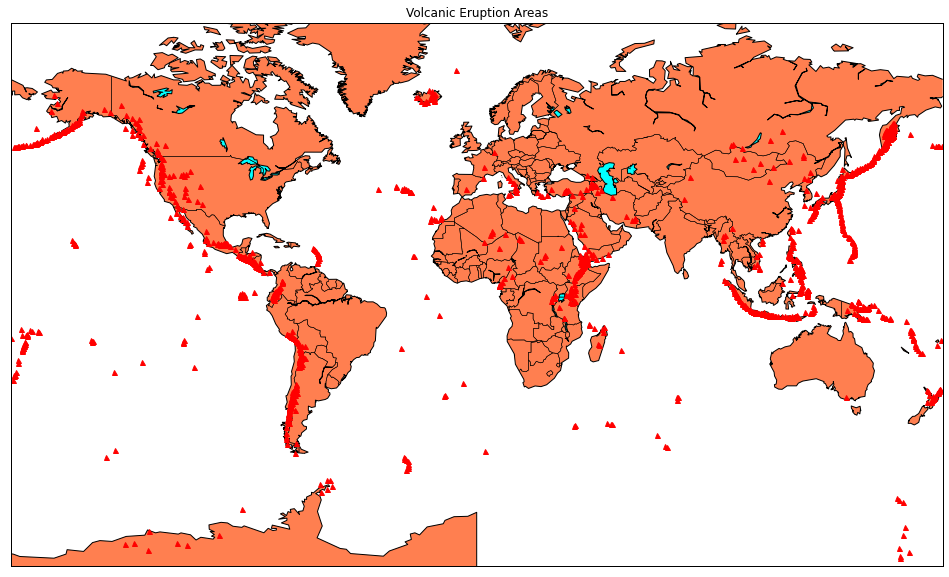

In [169]:
#Make the world map
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, lat_ts = 20, resolution = 'c')
fig = plt.figure(figsize = (25,10))

#Taking the logitutede and latitude values from the dataset
longitude_vol = volcanoes["Longitude"].tolist()
latitude_vol = volcanoes["Latitude"].tolist()

#Get the volcanic eruption location based on their own longitude and latitude
x, y = m(longitude_vol, latitude_vol)

#Plot all of the volcanic eruption location
plt.title("Volcanic Eruption Areas")
m.plot(x, y, "^", markersize = 5, color = 'red')

m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'coral', lake_color = 'aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

### Volcanic eruption based on volcanic type

Text(0.5, 1.0, 'Most Type of Volcanic Eruption')

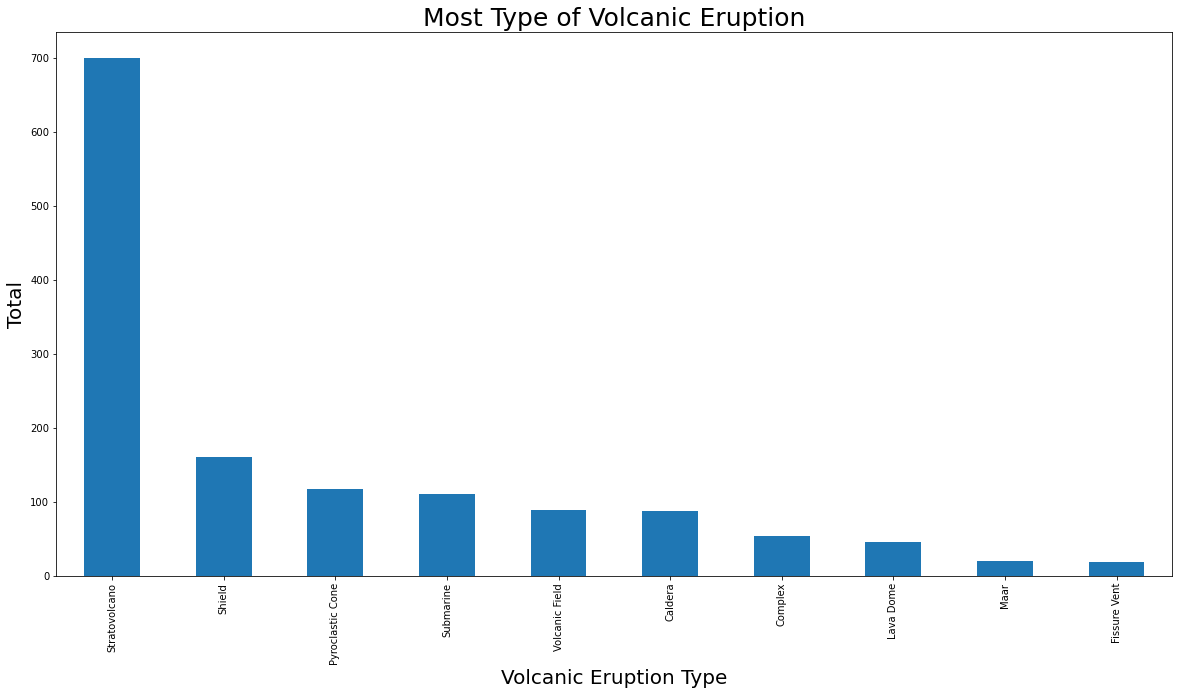

In [170]:
plt.figure(figsize = (20,10))
fig_p(volcanoes["Type"])
plt.xlabel("Volcanic Eruption Type", fontsize = 20)
plt.ylabel("Total", fontsize = 20)
plt.title("Most Type of Volcanic Eruption", fontsize = 25)

### Volcanic eruption based on the countries

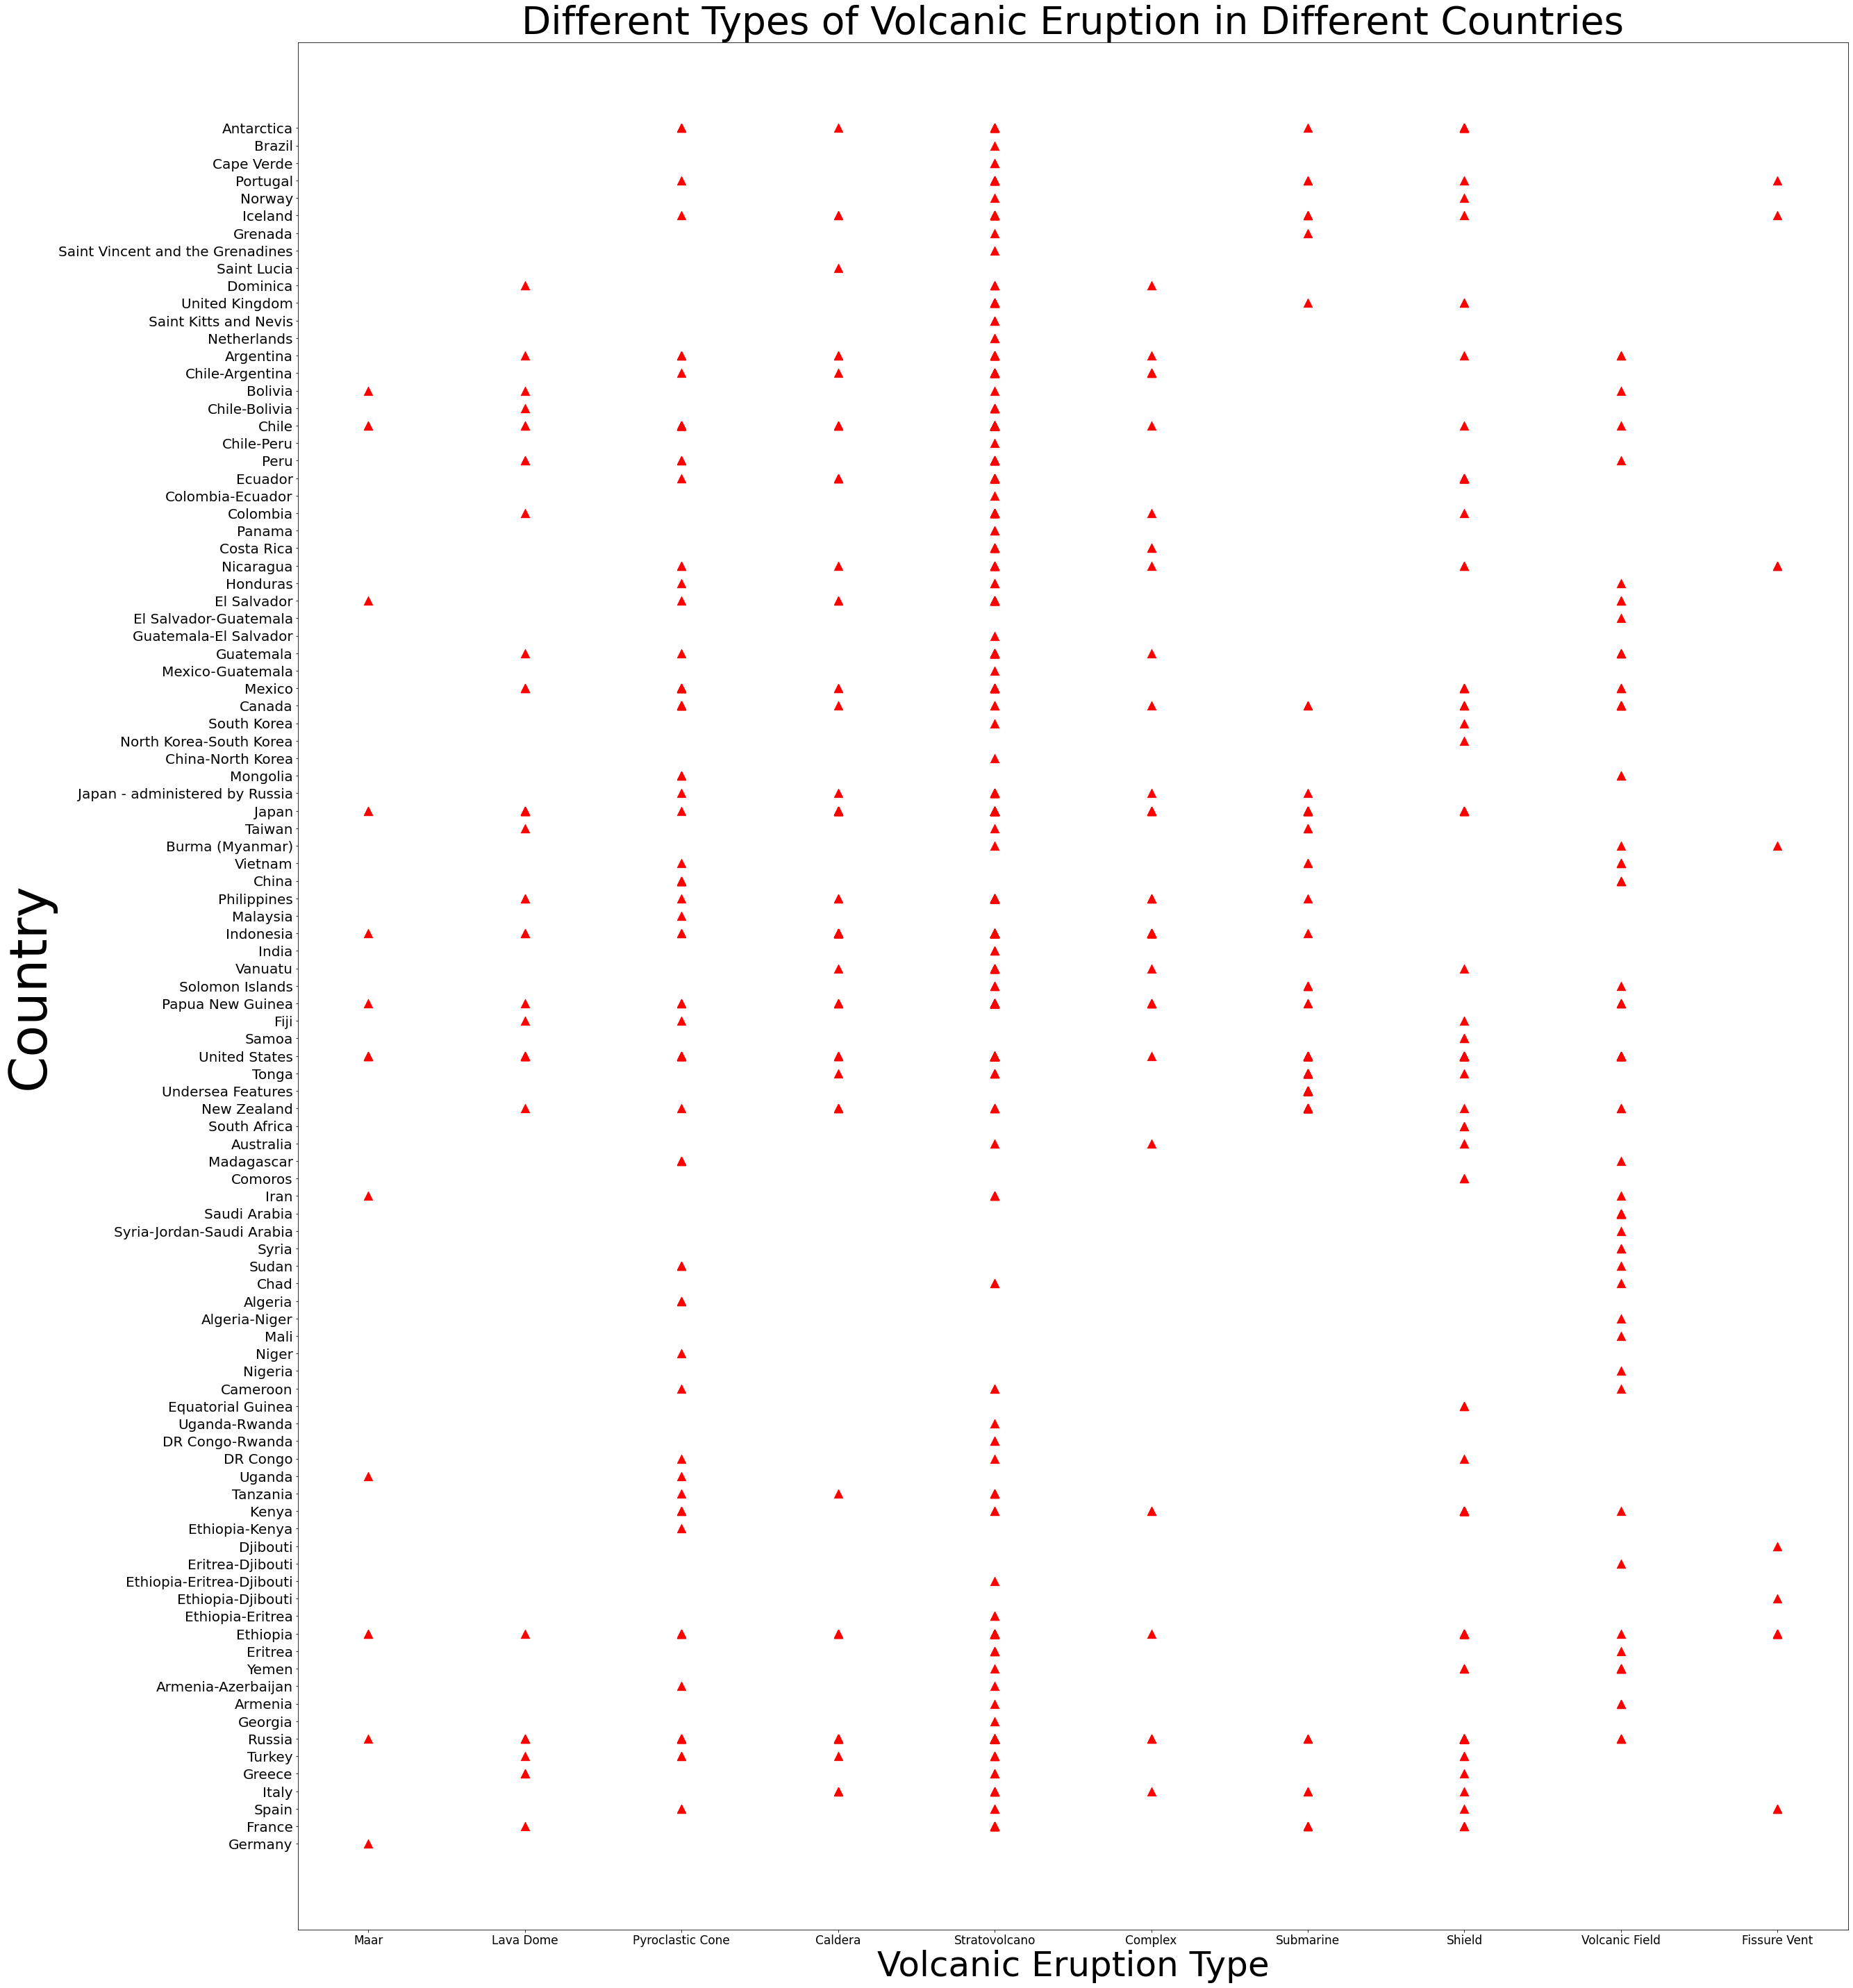

In [171]:
fig = plt.figure(figsize = (40, 50)) 
plt.scatter(volcanoes["Type"], volcanoes["Country"], marker = "^", s = 150, color = "red") 
plt.xlabel("Volcanic Eruption Type", fontsize = 50) 
plt.xticks(fontsize = 17)
plt.ylabel("Country", fontsize = 75) 
plt.yticks(fontsize = 20)
plt.title("Different Types of Volcanic Eruption in Different Countries", fontsize = 55)

plt.show()

### Volcanic eruption based on the regions

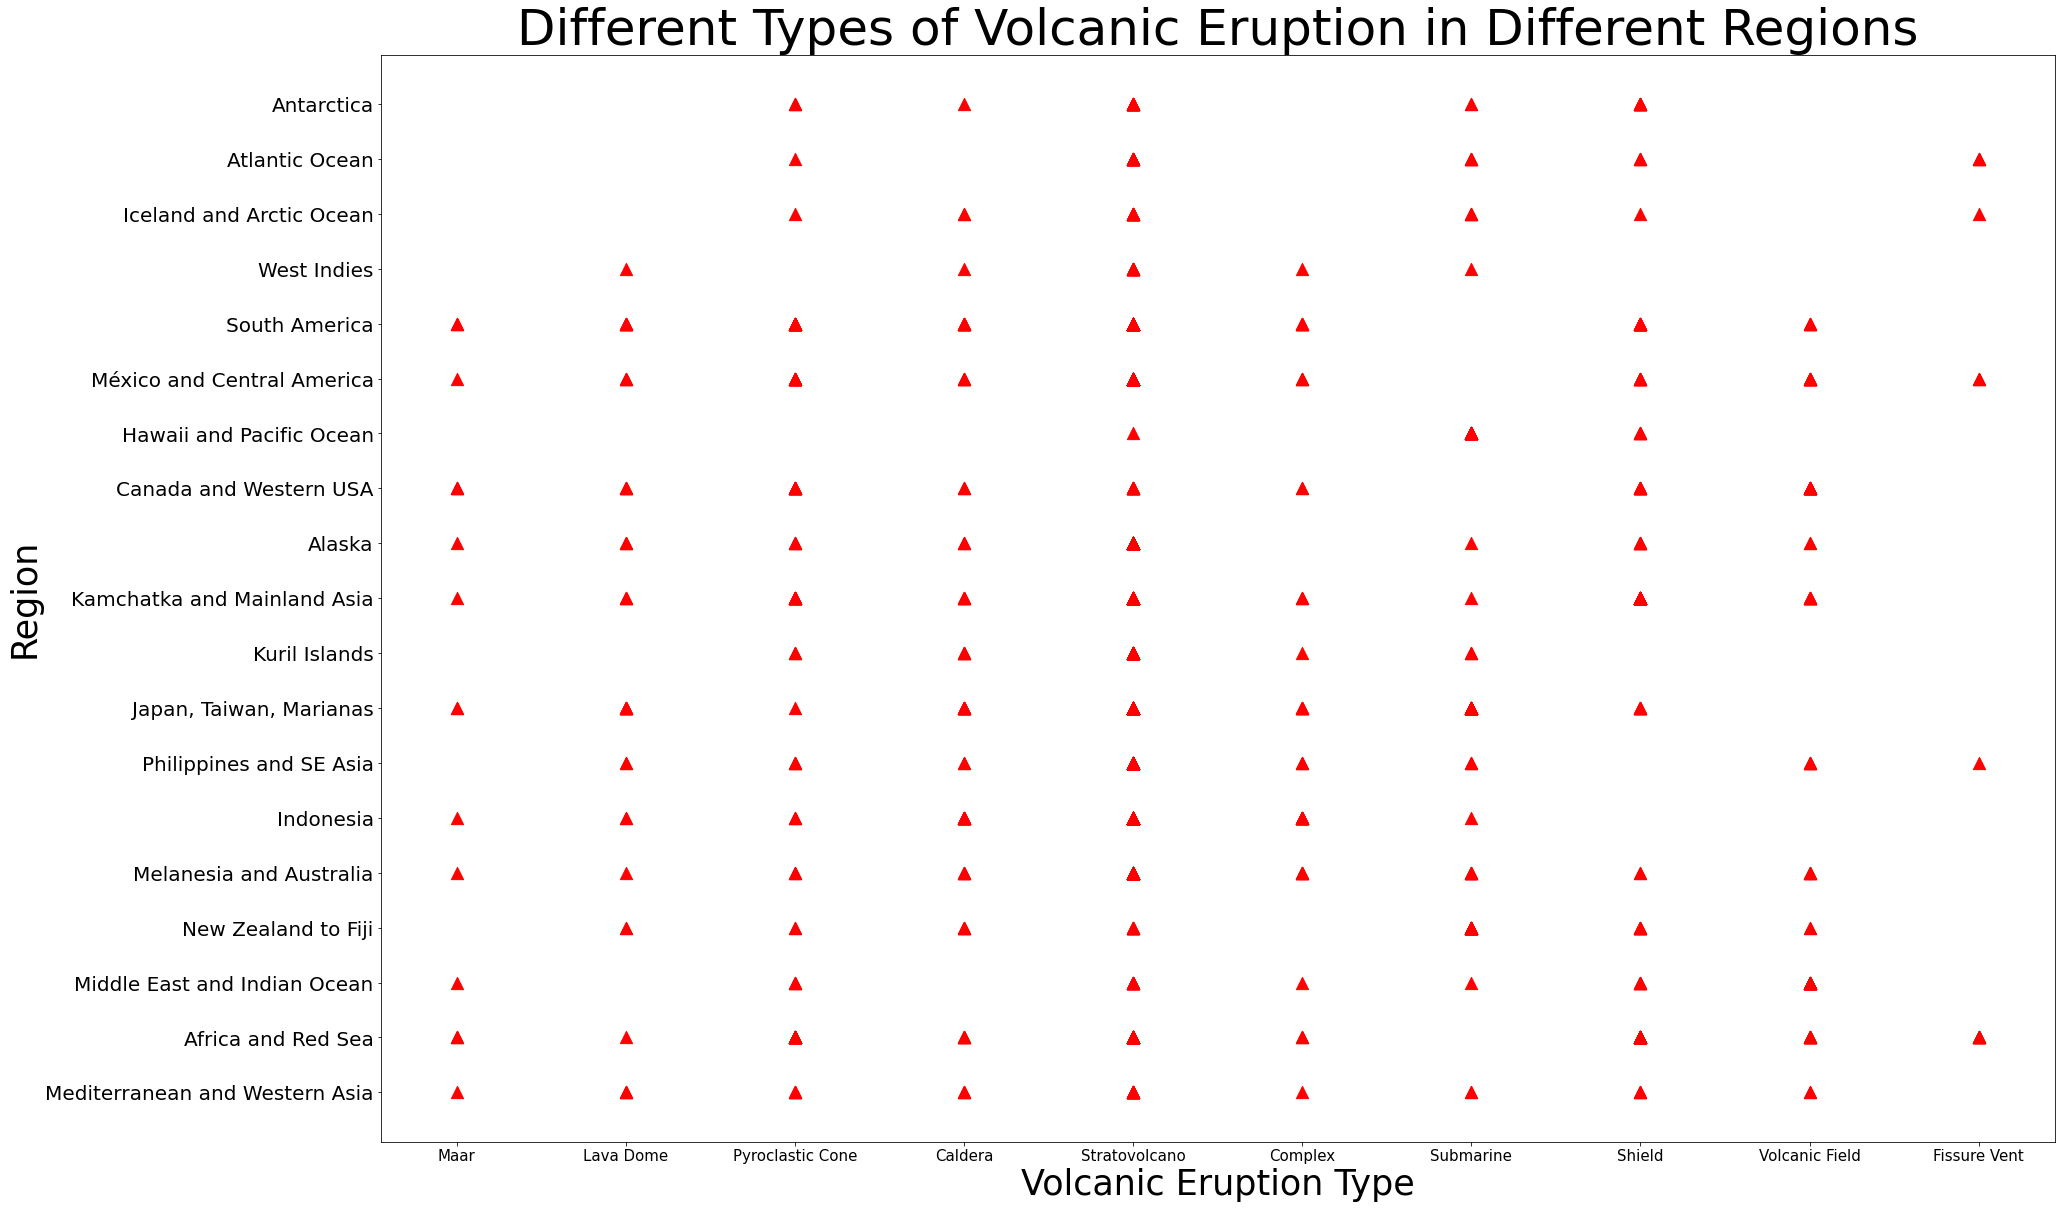

In [17]:
fig = plt.figure(figsize = (30, 20)) 
plt.scatter(volcanoes["Type"], volcanoes["Region"], marker = "^", s = 150, color = "red") 
plt.xlabel("Volcanic Eruption Type", fontsize = 35) 
plt.xticks(fontsize = 15)
plt.ylabel("Region", fontsize = 35) 
plt.yticks(fontsize = 20)
plt.title("Different Types of Volcanic Eruption in Different Regions", fontsize = 50)

plt.show()

### Volcanic eruption type based on the countries and regions

In [15]:
fig = px.scatter(volcanoes, x = 'Region', y = 'Country', color = 'Type', title = "Different Types of Volcanoes in Different Countries and Regions")
fig.show()

### Volcanic eruption with respect to countries, regions, longitude and latitude

In [16]:
fig = px.scatter_geo(volcanoes, lat = volcanoes.Latitude, lon = volcanoes.Longitude, hover_name = "Name", color = "Region")
fig.show()

## <center>Clustering using K-means Method</center>

### Visualize the data points

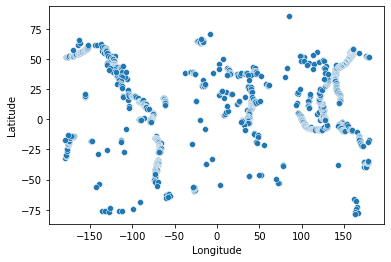

In [175]:
#Select longitude and latitude which will be used in this clustering
volc = volcanoes.loc[:, ['Longitude', 'Latitude']]
x = volc.values

#Show the position of the data points
sns.scatterplot(x[:,0], x[:, 1])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Subtract the longitude and latitude values

In [176]:
x = volcanoes.loc[:, ['Longitude', 'Latitude']]
x = np.array(x)
x

array([[  6.85 ,  50.17 ],
       [  2.97 ,  45.775],
       [  2.53 ,  42.17 ],
       ...,
       [-27.57 , -56.3  ],
       [-28.167, -55.912],
       [-57.75 , -64.15 ]])

### Optimal number of clusters

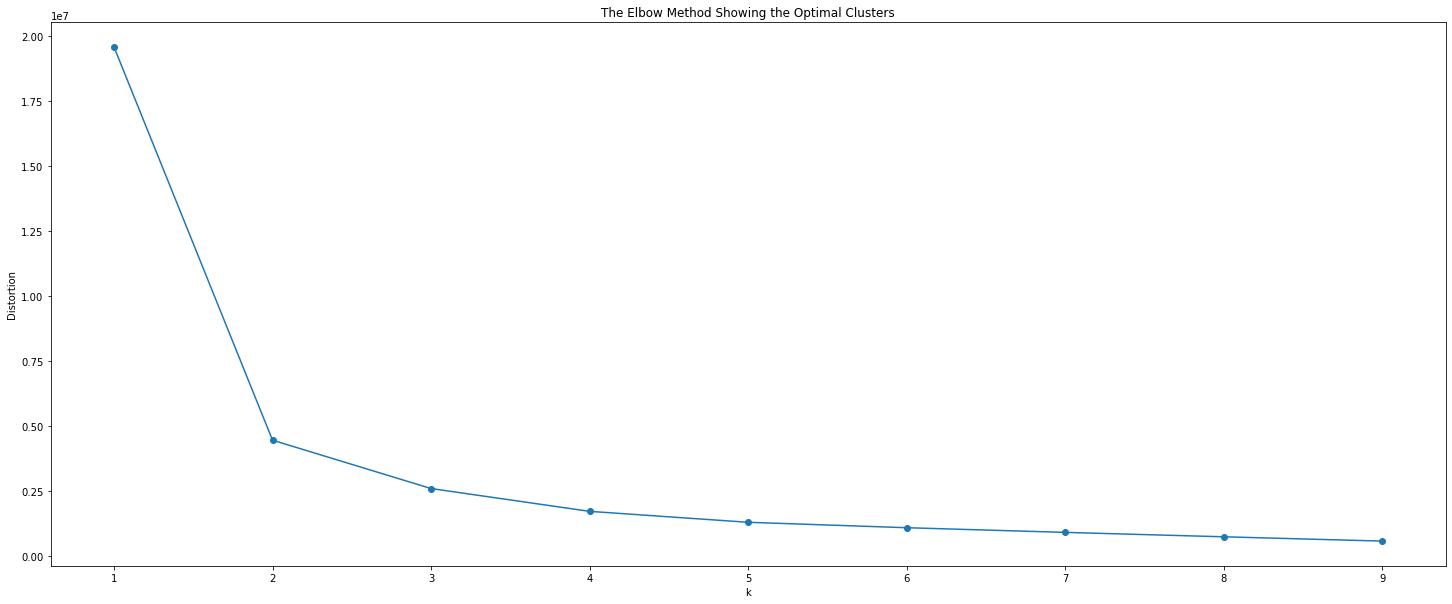

In [177]:
#Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

#Plotting the distortions
plt.figure(figsize = (25,10))
plt.plot(K, distortions, 'o-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal Clusters')
plt.show()

### Implement the K-Means method

In [178]:
#Define the model
kmeans_model = KMeans(n_clusters = 3, n_jobs = 3, random_state = 32932)

#Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

In [179]:
kmeans_model.cluster_centers_

array([[ 139.06539566,   19.34092321],
       [-105.84046729,    7.04055888],
       [  23.17895113,   14.95148872]])

In [180]:
volcanoes['Cluster'] = kmeans_predict

In [181]:
volcanoes['Cluster'].value_counts()

0    599
1    535
2    266
Name: Cluster, dtype: int64

In [183]:
volcanoes

Name         Country  \
0     West Eifel Volcanic Field         Germany   
1               Chaine des Puys          France   
2           Olot Volcanic Field           Spain   
3      Calatrava Volcanic Field           Spain   
5                       Vulsini           Italy   
...                         ...             ...   
1501                     Hodson  United Kingdom   
1502              Leskov Island  United Kingdom   
1503                 Zavodovski  United Kingdom   
1504        Protector Seamounts  United Kingdom   
1506          James Ross Island      Antarctica   

                              Region              Type  Activity Evidence  \
0     Mediterranean and Western Asia              Maar     Eruption Dated   
1     Mediterranean and Western Asia         Lava Dome     Eruption Dated   
2     Mediterranean and Western Asia  Pyroclastic Cone  Evidence Credible   
3     Mediterranean and Western Asia  Pyroclastic Cone     Eruption Dated   
5     Mediterranean and Western Asia           Caldera  Eruption Observed   
...                              ...               ...                ...   
1501                      Antarctica     Stratovolcano  Evidence Credible   
1502                      Antarctica     Stratovolcano  Unrest / Holocene   
1503                      Antarctica     Stratovolcano  Eruption Observed   
1504                      Antarctica         Submarine  Eruption Observed   
1506                      Antarctica            Shield  Evidence Credible   

     Last Known Eruption  Latitude  Longitude  Elevation (Meters)  \
0               8300 BCE    50.170      6.850                 600   
1               4040 BCE    45.775      2.970                1464   
2                Unknown    42.170      2.530                 893   
3               3600 BCE    38.870     -4.020                1117   
5                104 BCE    42.600     11.930                 800   
...                  ...       ...        ...                 ...   
1501             Unknown   -56.712    -27.176                 835   
1502             Unknown   -56.656    -28.140                 190   
1503             2016 CE   -56.300    -27.570                 551   
1504             1962 CE   -55.912    -28.167                 -55   
1506             Unknown   -64.150    -57.750                1630   

                    Dominant Rock Type  \
0                              Foidite   
1                Basalt / Picro-Basalt   
2     Trachybasalt / Tephrite Basanite   
3                Basalt / Picro-Basalt   
5              Trachyte / Trachydacite   
...                                ...   
1501             Basalt / Picro-Basalt   
1502      Andesite / Basaltic Andesite   
1503             Basalt / Picro-Basalt   
1504                          Rhyolite   
1506             Basalt / Picro-Basalt   

                                  Tectonic Setting  Cluster  
0           Rift Zone / Continental Crust (>25 km)        2  
1           Rift Zone / Continental Crust (>25 km)        2  
2          Intraplate / Continental Crust (>25 km)        2  
3          Intraplate / Continental Crust (>25 km)        2  
5     Subduction Zone / Continental Crust (>25 km)        2  
...                                            ...      ...  
1501     Subduction Zone / Oceanic Crust (< 15 km)        2  
1502     Subduction Zone / Oceanic Crust (< 15 km)        2  
1503     Subduction Zone / Oceanic Crust (< 15 km)        2  
1504     Subduction Zone / Oceanic Crust (< 15 km)        2  
1506       Intraplate / Continental Crust (>25 km)        1  

[1400 rows x 12 columns]

### Visualize the clusters

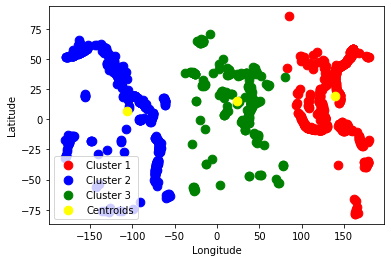

In [184]:
#Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 75, c = 'red', label = 'Cluster 1')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 75, c = 'blue', label = 'Cluster 2')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 75, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 75, c = 'yellow', label = 'Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

## <center>Clustering using K-means Method with Within-Cluster-Sum-of-Squares</center>

### Subtract the longitude and latitude values

In [185]:
volcan = pd.read_csv('volcanic.csv')
x = volcan.iloc[:, [8, 7]].values

### Find the optimal K value

In [186]:
#Using the Elbow method to find the optimal K value.
wcss = [] 

for i in range(1, 10): 
    #“init” argument is the method for initializing the centroid
    #We calculated the WCSS value for each K value
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 32932)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

### Plot the WCSS with K value

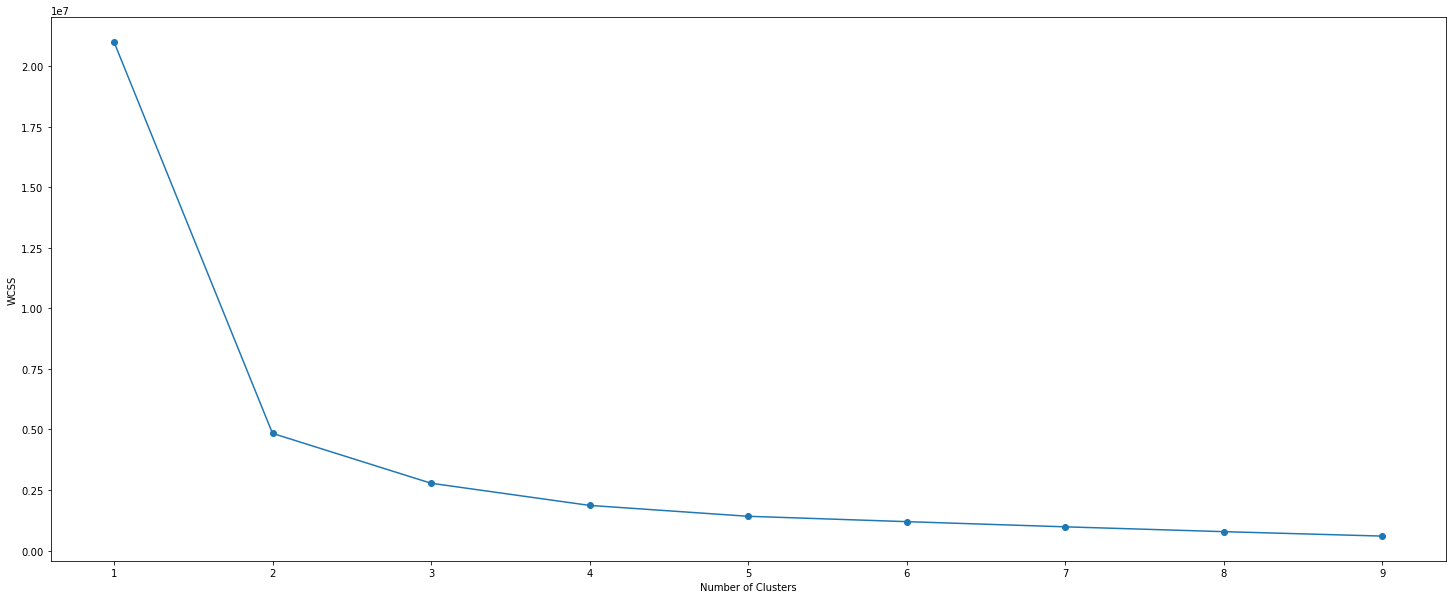

In [187]:
plt.figure(figsize = (25,10))
plt.plot(range(1, 10), wcss, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

### Train the model on the dataset with a number of clusters 3

In [188]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 32932)
y_kmeans = kmeans.fit_predict(x)

In [189]:
y_kmeans

array([2, 2, 2, ..., 0, 1, 1])

### Visualize the clusters

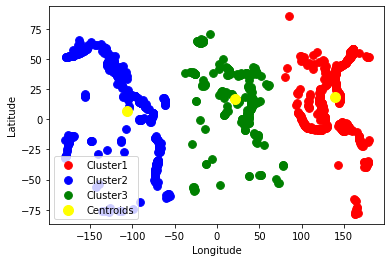

In [190]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 
plt.legend() 

plt.show()

## <center>Classification using Support Vector Machine</center>

### Check the dataset

In [691]:
volcanoes.head(5)

Name  Country                          Region  \
0  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
1            Chaine des Puys   France  Mediterranean and Western Asia   
2        Olot Volcanic Field    Spain  Mediterranean and Western Asia   
3   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
5                    Vulsini    Italy  Mediterranean and Western Asia   

               Type  Activity Evidence Last Known Eruption  Latitude  \
0              Maar     Eruption Dated            8300 BCE    50.170   
1         Lava Dome     Eruption Dated            4040 BCE    45.775   
2  Pyroclastic Cone  Evidence Credible             Unknown    42.170   
3  Pyroclastic Cone     Eruption Dated            3600 BCE    38.870   
5           Caldera  Eruption Observed             104 BCE    42.600   

   Longitude  Elevation (Meters)                Dominant Rock Type  \
0       6.85                 600                           Foidite   
1       2.97                1464             Basalt / Picro-Basalt   
2       2.53                 893  Trachybasalt / Tephrite Basanite   
3      -4.02                1117             Basalt / Picro-Basalt   
5      11.93                 800           Trachyte / Trachydacite   

                               Tectonic Setting  
0        Rift Zone / Continental Crust (>25 km)  
1        Rift Zone / Continental Crust (>25 km)  
2       Intraplate / Continental Crust (>25 km)  
3       Intraplate / Continental Crust (>25 km)  
5  Subduction Zone / Continental Crust (>25 km)

In [692]:
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1506
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1400 non-null   object 
 1   Country              1400 non-null   object 
 2   Region               1400 non-null   object 
 3   Type                 1400 non-null   object 
 4   Activity Evidence    1400 non-null   object 
 5   Last Known Eruption  1400 non-null   object 
 6   Latitude             1400 non-null   float64
 7   Longitude            1400 non-null   float64
 8   Elevation (Meters)   1400 non-null   int64  
 9   Dominant Rock Type   1400 non-null   object 
 10  Tectonic Setting     1400 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 131.2+ KB


### Change the data type to another one which uses less memory works

In [693]:
volcanoes['Country'] = volcanoes['Country'].astype('category') 
volcanoes['Region'] = volcanoes['Region'].astype('category') 
volcanoes['Longitude'] = volcanoes['Longitude'].astype(np.uint8)
volcanoes['Latitude'] = volcanoes['Latitude'].astype(np.uint8)

In [694]:
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1506
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Name                 1400 non-null   object  
 1   Country              1400 non-null   category
 2   Region               1400 non-null   category
 3   Type                 1400 non-null   object  
 4   Activity Evidence    1400 non-null   object  
 5   Last Known Eruption  1400 non-null   object  
 6   Latitude             1400 non-null   uint8   
 7   Longitude            1400 non-null   uint8   
 8   Elevation (Meters)   1400 non-null   int64   
 9   Dominant Rock Type   1400 non-null   object  
 10  Tectonic Setting     1400 non-null   object  
dtypes: category(2), int64(1), object(6), uint8(2)
memory usage: 96.5+ KB


### Subtract the column that will be needed or drop the column that aren't needed

In [695]:
#X variable will substract the country, region, longitude, and latitude
#Y variable will substract the volcanic eruption type
x = volcanoes.drop(['Name', 'Type', 'Activity Evidence', 'Last Known Eruption', 'Elevation (Meters)', 'Dominant Rock Type', 'Tectonic Setting'], axis = 1)
y = volcanoes[["Type"]]

In [696]:
x

Country                          Region  Latitude  Longitude
0            Germany  Mediterranean and Western Asia        50          6
1             France  Mediterranean and Western Asia        45          2
2              Spain  Mediterranean and Western Asia        42          2
3              Spain  Mediterranean and Western Asia        38        252
5              Italy  Mediterranean and Western Asia        42         11
...              ...                             ...       ...        ...
1501  United Kingdom                      Antarctica       200        229
1502  United Kingdom                      Antarctica       200        228
1503  United Kingdom                      Antarctica       200        229
1504  United Kingdom                      Antarctica       201        228
1506      Antarctica                      Antarctica       192        199

[1400 rows x 4 columns]

In [697]:
y

Type
0                 Maar
1            Lava Dome
2     Pyroclastic Cone
3     Pyroclastic Cone
5              Caldera
...                ...
1501     Stratovolcano
1502     Stratovolcano
1503     Stratovolcano
1504         Submarine
1506            Shield

[1400 rows x 1 columns]

### Encode the country, region, longitude, and latitude values into numericals

In [698]:
le = LabelEncoder() 
x = x.apply(le.fit_transform)
print(x)

      Country  Region  Latitude  Longitude
0          42      11        50          3
1          40      11        45          0
2          83      11        42          0
3          83      11        38        192
5          52      11        42          7
...       ...     ...       ...        ...
1501       94       2        86        174
1502       94       2        86        173
1503       94       2        86        174
1504       94       2        87        173
1506        2       2        80        167

[1400 rows x 4 columns]


### Split the X and Y dataset

In [699]:
#Split the X and Y datasets into the training set and test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Perform feature scaling

In [700]:
#Do feature scaling to normalize the data within a particular range
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [701]:
x_train

array([[0.33673469, 0.        , 0.08633094, 0.16315789],
       [0.29591837, 0.77777778, 0.09352518, 0.73157895],
       [0.60204082, 0.77777778, 0.13669065, 0.68421053],
       ...,
       [0.15306122, 0.94444444, 0.81294964, 0.83157895],
       [0.54081633, 0.44444444, 0.25899281, 0.57894737],
       [0.75510204, 0.55555556, 0.35251799, 0.65789474]])

Text(0.5, 1.0, 'Scaled data')

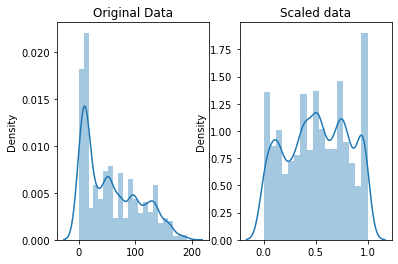

In [702]:
fig, ax = plt.subplots(1,2)
sns.distplot(x, ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_train, ax = ax[1])
ax[1].set_title("Scaled data")

### Fit SVM to the training set

In [703]:
#Fit the SVM algorithm to the training set- x_train and y_train.
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

### Predict the test set results

In [704]:
y_pred = classifier.predict(x_test)

### Make the confusion matrix and calculate the accuracy of the predictions

In [705]:
#Make confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Use the confusion matrix to calculate the accuracy of the predictions
accuracy1 = accuracy_score(y_test,y_pred) * 100
print("\n Accuracy : ", accuracy1)

report = classification_report(y_test, y_pred)
print ("\n Report : ",  report)

[[  0   0   0   0   0   0   0  14   1   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   6   1   0]
 [  0   0   0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   1  33   1   1]
 [  0   0   0   0   0   0   2  46   6   0]
 [  0   0   0   0   0   1   1 169   3   3]
 [  0   0   0   0   0   0   0  19   7   0]
 [  0   0   0   0   0   0   2  11   1   1]]

 Accuracy :  51.142857142857146

 Report :                    precision    recall  f1-score   support

         Caldera       0.00      0.00      0.00        15
         Complex       0.00      0.00      0.00        15
    Fissure Vent       0.00      0.00      0.00         2
       Lava Dome       0.00      0.00      0.00         7
            Maar       0.00      0.00      0.00         3
Pyroclastic Cone       0.00      0.00      0.00        36
          Shield       0.33      0.04      0.07        54
   Stratovolcano       0.53      0.95      0.68       177
 

## <center>Classification using Decision Tree with Gini Index and Entropy</center>

### Check the dataset

In [649]:
volcanoes.head(5)

Name  Country                          Region  \
0  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
1            Chaine des Puys   France  Mediterranean and Western Asia   
2        Olot Volcanic Field    Spain  Mediterranean and Western Asia   
3   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
5                    Vulsini    Italy  Mediterranean and Western Asia   

               Type  Activity Evidence Last Known Eruption  Latitude  \
0              Maar     Eruption Dated            8300 BCE    50.170   
1         Lava Dome     Eruption Dated            4040 BCE    45.775   
2  Pyroclastic Cone  Evidence Credible             Unknown    42.170   
3  Pyroclastic Cone     Eruption Dated            3600 BCE    38.870   
5           Caldera  Eruption Observed             104 BCE    42.600   

   Longitude  Elevation (Meters)                Dominant Rock Type  \
0       6.85                 600                           Foidite   
1       2.97                1464             Basalt / Picro-Basalt   
2       2.53                 893  Trachybasalt / Tephrite Basanite   
3      -4.02                1117             Basalt / Picro-Basalt   
5      11.93                 800           Trachyte / Trachydacite   

                               Tectonic Setting  
0        Rift Zone / Continental Crust (>25 km)  
1        Rift Zone / Continental Crust (>25 km)  
2       Intraplate / Continental Crust (>25 km)  
3       Intraplate / Continental Crust (>25 km)  
5  Subduction Zone / Continental Crust (>25 km)

### Subtract the column that will be needed or drop the column that aren't needed

In [650]:
x = volcanoes.drop(['Name', 'Type', 'Activity Evidence', 'Last Known Eruption', 'Elevation (Meters)', 'Dominant Rock Type', 'Tectonic Setting'], axis = 1)
y = volcanoes[["Type"]]

### Encode the country, region, longitude, and latitude values into numericals

In [651]:
le = LabelEncoder() 
x = x.apply(le.fit_transform)
print(x)

      Country  Region  Latitude  Longitude
0          42      11      1114        593
1          40      11      1073        589
2          83      11      1015        587
3          83      11       976        586
5          52      11      1020        602
...       ...     ...       ...        ...
1501       94       2        27        540
1502       94       2        28        534
1503       94       2        29        537
1504       94       2        31        533
1506        2       2        17        524

[1400 rows x 4 columns]


### Split the X and Y dataset

In [652]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

### Using Gini Index

In [653]:
#Decide the criterion, max height of tree, and maximum leaf samples
clf_gini = DecisionTreeClassifier(criterion = "gini",                
                                  max_depth = 5, 
                                  min_samples_split = 3,             
                                  random_state = 0)

In [654]:
#Train the model
clf_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=0)

In [655]:
#Perform prediction
y_pred_gini = clf_gini.predict(x_test)  

In [656]:
#Evaluate prediction
print ("\n Accuracy : ", accuracy_score(y_test,y_pred_gini) * 100)
print ("\n Report : ",  classification_report(y_test, y_pred_gini))


 Accuracy :  54.85714285714286

 Report :                    precision    recall  f1-score   support

         Caldera       0.00      0.00      0.00        15
         Complex       0.00      0.00      0.00        15
    Fissure Vent       0.00      0.00      0.00         2
       Lava Dome       0.00      0.00      0.00         7
            Maar       0.00      0.00      0.00         3
Pyroclastic Cone       0.44      0.19      0.27        36
          Shield       0.65      0.41      0.50        54
   Stratovolcano       0.61      0.82      0.70       177
       Submarine       0.39      0.54      0.45        26
  Volcanic Field       0.17      0.27      0.21        15

        accuracy                           0.55       350
       macro avg       0.22      0.22      0.21       350
    weighted avg       0.49      0.55      0.50       350



[Text(138.4269230769231, 199.32, 'X[1] <= 0.5\ngini = 0.716\nsamples = 1050\nvalue = [72, 39, 16, 39, 16, 81, 106, 523, 84, 74]'),
 Text(45.06923076923077, 163.07999999999998, 'X[2] <= 424.5\ngini = 0.806\nsamples = 95\nvalue = [6, 3, 8, 1, 2, 18, 22, 28, 0, 7]'),
 Text(12.876923076923077, 126.83999999999999, 'X[3] <= 629.0\ngini = 0.43\nsamples = 11\nvalue = [1, 0, 0, 0, 0, 2, 0, 8, 0, 0]'),
 Text(6.438461538461539, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(19.315384615384616, 90.6, 'X[2] <= 396.5\ngini = 0.34\nsamples = 10\nvalue = [1, 0, 0, 0, 0, 1, 0, 8, 0, 0]'),
 Text(12.876923076923077, 54.359999999999985, 'X[2] <= 283.5\ngini = 0.625\nsamples = 4\nvalue = [1, 0, 0, 0, 0, 1, 0, 2, 0, 0]'),
 Text(6.438461538461539, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 2, 0, 0]'),
 Text(19.315384615384616, 18.119999999999976, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(25.753846153846155, 54.3

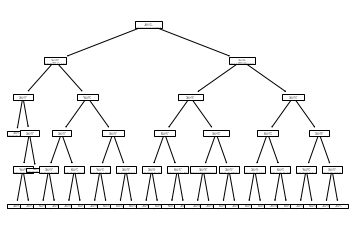

In [657]:
#Visualize decision tree using gini index
tree.plot_tree(clf_gini)

### Using Entropy

In [658]:
#Decide the criterion, max height of tree, and maximum leaf samples
clf_entropy = DecisionTreeClassifier(criterion = "entropy",                
                                  max_depth = 5, 
                                  min_samples_split = 3,             
                                  random_state = 0)

In [659]:
#Train the model
clf_entropy.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       random_state=0)

In [660]:
#Perform prediction
y_pred_entropy = clf_entropy.predict(x_test) 

In [661]:
#Evaluate prediction
print ("\n Accuracy : ", accuracy_score(y_test,y_pred_entropy) * 100)      
print ("\n Report : ",  classification_report(y_test, y_pred_entropy))


 Accuracy :  56.285714285714285

 Report :                    precision    recall  f1-score   support

         Caldera       0.00      0.00      0.00        15
         Complex       0.00      0.00      0.00        15
    Fissure Vent       0.00      0.00      0.00         2
       Lava Dome       0.00      0.00      0.00         7
            Maar       0.00      0.00      0.00         3
Pyroclastic Cone       0.21      0.14      0.17        36
          Shield       0.75      0.39      0.51        54
   Stratovolcano       0.59      0.86      0.70       177
       Submarine       0.50      0.62      0.55        26
  Volcanic Field       0.38      0.20      0.26        15

        accuracy                           0.56       350
       macro avg       0.24      0.22      0.22       350
    weighted avg       0.49      0.56      0.50       350



[Text(167.4, 199.32, 'X[0] <= 78.5\nentropy = 2.483\nsamples = 1050\nvalue = [72, 39, 16, 39, 16, 81, 106, 523, 84, 74]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 4.5\nentropy = 2.413\nsamples = 823\nvalue = [65, 37, 13, 30, 12, 69, 89, 427, 38, 43]'),
 Text(41.85, 126.83999999999999, 'X[2] <= 541.5\nentropy = 2.647\nsamples = 124\nvalue = [7, 4, 9, 1, 1, 22, 31, 36, 2, 11]'),
 Text(20.925, 90.6, 'X[3] <= 678.5\nentropy = 1.949\nsamples = 48\nvalue = [1, 2, 0, 0, 0, 10, 19, 15, 1, 0]'),
 Text(10.4625, 54.359999999999985, 'X[3] <= 522.0\nentropy = 1.834\nsamples = 41\nvalue = [1, 2, 0, 0, 0, 9, 19, 10, 0, 0]'),
 Text(5.23125, 18.119999999999976, 'entropy = 0.986\nsamples = 9\nvalue = [1, 0, 0, 0, 0, 0, 7, 1, 0, 0]'),
 Text(15.693750000000001, 18.119999999999976, 'entropy = 1.81\nsamples = 32\nvalue = [0, 2, 0, 0, 0, 9, 12, 9, 0, 0]'),
 Text(31.387500000000003, 54.359999999999985, 'X[2] <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [0, 0, 0, 0, 0, 1, 0, 5, 1, 0]'),
 Text(26.15625, 18.11

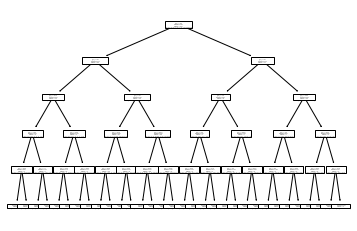

In [662]:
#Visualize decision tree using entropy
tree.plot_tree(clf_entropy)

## <center>Classification using K-Nearest Neighbors</center>

### Check the dataset 

In [722]:
volcanoes.head(5)

Name  Country                          Region  \
0  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
1            Chaine des Puys   France  Mediterranean and Western Asia   
2        Olot Volcanic Field    Spain  Mediterranean and Western Asia   
3   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
5                    Vulsini    Italy  Mediterranean and Western Asia   

               Type  Activity Evidence Last Known Eruption  Latitude  \
0              Maar     Eruption Dated            8300 BCE    50.170   
1         Lava Dome     Eruption Dated            4040 BCE    45.775   
2  Pyroclastic Cone  Evidence Credible             Unknown    42.170   
3  Pyroclastic Cone     Eruption Dated            3600 BCE    38.870   
5           Caldera  Eruption Observed             104 BCE    42.600   

   Longitude  Elevation (Meters)                Dominant Rock Type  \
0       6.85                 600                           Foidite   
1       2.97                1464             Basalt / Picro-Basalt   
2       2.53                 893  Trachybasalt / Tephrite Basanite   
3      -4.02                1117             Basalt / Picro-Basalt   
5      11.93                 800           Trachyte / Trachydacite   

                               Tectonic Setting  
0        Rift Zone / Continental Crust (>25 km)  
1        Rift Zone / Continental Crust (>25 km)  
2       Intraplate / Continental Crust (>25 km)  
3       Intraplate / Continental Crust (>25 km)  
5  Subduction Zone / Continental Crust (>25 km)

### Subtract the column that will be needed or drop the column that aren't needed

In [723]:
x = volcanoes.drop(['Name', 'Type', 'Activity Evidence', 'Last Known Eruption', 'Elevation (Meters)', 'Dominant Rock Type', 'Tectonic Setting'], axis = 1)
y = volcanoes[["Type"]]

### Encode the country, region, longitude, and latitude values into numericals

In [724]:
le = LabelEncoder() 
x = x.apply(le.fit_transform)
print(x)

      Country  Region  Latitude  Longitude
0          42      11      1114        593
1          40      11      1073        589
2          83      11      1015        587
3          83      11       976        586
5          52      11      1020        602
...       ...     ...       ...        ...
1501       94       2        27        540
1502       94       2        28        534
1503       94       2        29        537
1504       94       2        31        533
1506        2       2        17        524

[1400 rows x 4 columns]


### Split the X and Y dataset

In [725]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [726]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Using Manhattan Distance

In [727]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [728]:
y_pred = classifier.predict(x_test)

In [729]:
#Make confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Use the confusion matrix to calculate the accuracy of the predictions
accuracy4 = accuracy_score(y_test,y_pred) * 100
print("\n Accuracy : ", accuracy4)

report = classification_report(y_test, y_pred)
print ("\n Report : ",  report)

[[  0   1   0   0   0   0   0  13   1   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   1   0   0   1   0   0   0   0]
 [  1   0   0   1   0   1   1   2   0   1]
 [  0   0   0   1   0   0   1   1   0   0]
 [  3   0   0   0   0   8   2  21   0   2]
 [  1   1   0   1   0   4  19  22   5   1]
 [  9   5   1   2   0   6  14 134   5   1]
 [  2   1   0   0   0   1   0   9  12   1]
 [  0   0   0   0   0   2   2   6   0   5]]

 Accuracy :  51.42857142857142

 Report :                    precision    recall  f1-score   support

         Caldera       0.00      0.00      0.00        15
         Complex       0.00      0.00      0.00        15
    Fissure Vent       0.50      0.50      0.50         2
       Lava Dome       0.20      0.14      0.17         7
            Maar       0.00      0.00      0.00         3
Pyroclastic Cone       0.35      0.22      0.27        36
          Shield       0.49      0.35      0.41        54
   Stratovolcano       0.60      0.76      0.67       177
  

### Using Euclidean  Distance

In [730]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [731]:
y_pred = classifier.predict(x_test)

In [732]:
#Make confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Use the confusion matrix to calculate the accuracy of the predictions
accuracy5 = accuracy_score(y_test,y_pred) * 100
print("\n Accuracy : ", accuracy5)

report = classification_report(y_test, y_pred)
print ("\n Report : ",  report)

[[  0   1   0   0   0   0   0  13   1   0]
 [  0   0   0   0   0   0   1  14   0   0]
 [  0   0   0   0   0   2   0   0   0   0]
 [  1   0   0   1   0   0   1   3   0   1]
 [  0   0   0   1   0   0   1   1   0   0]
 [  2   0   0   0   0   7   3  22   0   2]
 [  2   0   0   1   0   5  17  23   5   1]
 [  8   4   1   2   0   6  14 135   5   2]
 [  2   1   0   0   0   1   1   8  12   1]
 [  0   0   0   0   0   2   2   6   0   5]]

 Accuracy :  50.57142857142857

 Report :                    precision    recall  f1-score   support

         Caldera       0.00      0.00      0.00        15
         Complex       0.00      0.00      0.00        15
    Fissure Vent       0.00      0.00      0.00         2
       Lava Dome       0.20      0.14      0.17         7
            Maar       0.00      0.00      0.00         3
Pyroclastic Cone       0.30      0.19      0.24        36
          Shield       0.42      0.31      0.36        54
   Stratovolcano       0.60      0.76      0.67       177
  

## <center>Comparing Accuracy Score for Each Classification Algorithms</center>

In [733]:
#Using SVM
print("Accuracy using SVM : ", accuracy1)

#Using Decision Tree with Gini Index
accuracy2 = accuracy_score(y_test,y_pred_gini) * 100
print ("Accuracy using Decision Tree with Gini Index : ", accuracy2)

#Using Decision Tree with Entropy
accuracy3 = accuracy_score(y_test,y_pred_entropy) * 100
print ("Accuracy using Decision Tree with Entropy : ", accuracy3)

#Using K-Nearest Neighbors with Manhattan Distance
print("Accuracy using K-Nearest Neighbors with Manhattan Distance : ", accuracy4)

#Using K-Nearest Neighbors with Euclidean  Distance
print("Accuracy using K-Nearest Neighbors with Euclidean  Distance : ", accuracy5)

Accuracy using SVM :  51.142857142857146
Accuracy using Decision Tree with Gini Index :  54.85714285714286
Accuracy using Decision Tree with Entropy :  56.285714285714285
Accuracy using K-Nearest Neighbors with Manhattan Distance :  51.42857142857142
Accuracy using K-Nearest Neighbors with Euclidean  Distance :  50.57142857142857
